In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
import os
import import_ipynb
os.chdir(os.getcwd()+'\\Modules')
from time_shifted_PID import PIfunc
%matplotlib inline

importing Jupyter notebook from time_shifted_PID.ipynb


In [2]:
## EqualState assign states with equal possibility for input array x
def EqualState(x, num_state):
    xs=np.sort(x)
    binlen=int(len(x)/num_state-0.5) #round
    edges = xs[np.arange(num_state)*binlen]
    xstate=np.zeros(len(x))
    for i in range(num_state):
        xstate[x>=edges[i]] = i
    xstate = xstate.astype(int)
    return xstate

In [3]:
RN=np.random.normal(1,1,size = 30000)
x = ndimage.gaussian_filter1d(RN, sigma=5)
x = EqualState(x, 10)
z = x[3:]
x = x[:-3]
y = np.random.poisson(x)
x = np.random.poisson(x)
timeshift, Information = PIfunc(z, x, y, 1, [-10,10], 'BROJA')
Syn_l = Information[('BROJA_2PID','CI')].copy()
Rdn_l = Information[('BROJA_2PID','SI')].copy()
Ux_l = Information[('BROJA_2PID','UIx')].copy()
Uy_l = Information[('BROJA_2PID','UIv')].copy()

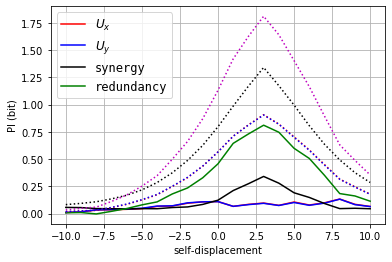

In [4]:
plt.plot(timeshift,Ux_l,'r')
plt.plot(timeshift,Uy_l,'b')
plt.plot(timeshift,Syn_l,'k')
plt.plot(timeshift,Rdn_l,'g')

plt.plot(timeshift,Ux_l+Rdn_l,'r:')
plt.plot(timeshift,Uy_l+Rdn_l,'b:')
plt.plot(timeshift,Syn_l+Uy_l+Rdn_l+Ux_l,'k:')
plt.plot(timeshift,Uy_l+2*Rdn_l+Ux_l,'m:')

plt.grid()
plt.xlabel('self-displacement')
plt.ylabel('PI (bit)')
plt.legend( (r'$U_x$', r'$U_y$', 'synergy', 'redundancy'), loc='best', prop={'size': 'large', 'family': 'monospace'})